In [25]:
# necessary imports.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Only the following libraries will be allowed to be used in the competition:

1. NumPy
2. Pandas
3. Matplotlib
4. Scikit-learn 
5. XGBoost
6. Seaborn
7. Imblearn
8. SciPy
9. Pickle
10. regex
11. Lightgbm
12. Plotly

## Crude workflow.
1. perform EDA-cum-Dimensionaltity reduction.
2. standarsise the data if not in the first step.
3. make the models 
4. tarin the models on the data 
5. test the models 
6. then decide the best one

## Loading the data

In [2]:
train=pd.read_csv(r'/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
train

last contact date  age           job   marital  education default  \
0            2009-04-17   26   blue-collar   married  secondary      no   
1            2009-10-11   52    technician   married  secondary      no   
2            2010-11-20   44   blue-collar   married  secondary      no   
3            2009-09-01   33        admin.   married  secondary      no   
4            2008-01-29   31  entrepreneur    single   tertiary      no   
...                 ...  ...           ...       ...        ...     ...   
39206        2008-07-31   31    technician    single  secondary      no   
39207        2009-07-31   59        admin.   married    primary      no   
39208        2008-06-02   36   blue-collar   married  secondary      no   
39209        2010-03-20   28       student    single  secondary      no   
39210        2010-03-16   51       student  divorced   tertiary     yes   

       balance housing loan    contact  duration  campaign  pdays  previous  \
0          647     yes   no   cellular       357         2    331         1   
1          553     yes   no  telephone       160         1     -1         0   
2         1397      no   no   cellular       326         1     -1         0   
3          394     yes   no  telephone       104         3     -1         0   
4          137      no   no   cellular       445         2     -1         0   
...        ...     ...  ...        ...       ...       ...    ...       ...   
39206        0     yes   no   cellular        16        34     -1         0   
39207     6187      no   no   cellular       114         4     -1         0   
39208       63     yes   no        NaN        56         8     -1         0   
39209     5916      no   no   cellular        93         5     -1         0   
39210    38594     yes   no   cellular      1877        19    780       148   

      poutcome target  
0        other     no  
1          NaN     no  
2          NaN     no  
3          NaN     no  
4          NaN     no  
...        ...    ...  
39206      NaN     no  
39207      NaN     no  
39208      NaN     no  
39209      NaN     no  
39210  success    yes  

[39211 rows x 16 columns]

In [3]:
unique_values = {}
colns = train.select_dtypes(include=['object']).columns  

for col in colns:
    unique_values[col] = train[col].unique()  

unique_values


{'last contact date': array(['2009-04-17', '2009-10-11', '2010-11-20', ..., '2009-07-05',
        '2008-02-25', '2010-04-12'], dtype=object),
 'job': array(['blue-collar', 'technician', 'admin.', 'entrepreneur',
        'unemployed', 'management', 'services', 'student', 'self-employed',
        'retired', 'housemaid', nan], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['secondary', 'tertiary', 'primary', nan], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'housing': array(['yes', 'no'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'telephone', nan], dtype=object),
 'poutcome': array(['other', nan, 'failure', 'success'], dtype=object),
 'target': array(['no', 'yes'], dtype=object)}

In [4]:
train.describe()

age        balance      duration      campaign         pdays  \
count  39211.000000   39211.000000  39211.000000  39211.000000  39211.000000   
mean      42.120247    5441.781719    439.062789      5.108770     72.256051   
std       12.709352   16365.292065    769.096291      9.890153    160.942593   
min       18.000000   -8019.000000      0.000000      1.000000     -1.000000   
25%       33.000000      98.000000    109.000000      1.000000     -1.000000   
50%       40.000000     549.000000    197.000000      2.000000     -1.000000   
75%       50.000000    2030.000000    380.000000      4.000000     -1.000000   
max       95.000000  102127.000000   4918.000000     63.000000    871.000000   

           previous  
count  39211.000000  
mean      11.826171  
std       44.140259  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000

In [5]:
train['last contact date'] = pd.to_datetime(train['last contact date'])

## EDA and cleaning the data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   last contact date  39211 non-null  datetime64[ns]
 1   age                39211 non-null  int64         
 2   job                38982 non-null  object        
 3   marital            39211 non-null  object        
 4   education          37744 non-null  object        
 5   default            39211 non-null  object        
 6   balance            39211 non-null  int64         
 7   housing            39211 non-null  object        
 8   loan               39211 non-null  object        
 9   contact            28875 non-null  object        
 10  duration           39211 non-null  int64         
 11  campaign           39211 non-null  int64         
 12  pdays              39211 non-null  int64         
 13  previous           39211 non-null  int64         
 14  poutco

In [7]:
train.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [8]:
# Get the mode of the columns and their counts
poutcome_mode = train['poutcome'].mode()[0]
poutcome_count = (train['poutcome'] == poutcome_mode).sum()

contact_mode = train['contact'].mode()[0]
contact_count = (train['contact'] == contact_mode).sum()

education_mode = train['education'].mode()[0]
education_count = (train['education'] == education_mode).sum()

job_mode = train['job'].mode()[0]
job_count = (train['job'] == job_mode).sum()

# Print the modes and their counts
print(f"The mode of the 'poutcome' column is: {poutcome_mode} (Count: {poutcome_count})")
print(f"The mode of the 'contact' column is: {contact_mode} (Count: {contact_count})")
print(f"The mode of the 'education' column is: {education_mode} (Count: {education_count})")
print(f"The mode of the 'job' column is: {job_mode} (Count: {job_count})")


The mode of the 'poutcome' column is: failure (Count: 4949)
The mode of the 'contact' column is: cellular (Count: 25030)
The mode of the 'education' column is: secondary (Count: 19584)
The mode of the 'job' column is: blue-collar (Count: 7776)


In [9]:
oe = OrdinalEncoder()

for i in train.columns:
    if train[i].dtype == 'object':
        # Fit and transform only the unique values of the column
        unique_values = train[i].unique().reshape(-1, 1)  # Reshape for a 2D array
        encoded_values = oe.fit_transform(unique_values)
        
        # Print the original unique values and their encoded values
        print(f"Column: {i}")
        print("Original unique values:\n", unique_values.flatten())  # Original unique values
        print("Encoded values:\n", encoded_values.flatten())  # Encoded values
        print()  # Print a new line for better separation
        
        # Assign the encoded values back to the DataFrame for the original column
        train[i] = oe.transform(train[[i]])

train.info()


Column: job
Original unique values:
 ['blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid'
 nan]
Encoded values:
 [ 1.  9.  0.  2. 10.  4.  7.  8.  6.  5.  3. nan]

Column: marital
Original unique values:
 ['married' 'single' 'divorced']
Encoded values:
 [1. 2. 0.]

Column: education
Original unique values:
 ['secondary' 'tertiary' 'primary' nan]
Encoded values:
 [ 1.  2.  0. nan]

Column: default
Original unique values:
 ['no' 'yes']
Encoded values:
 [0. 1.]

Column: housing
Original unique values:
 ['yes' 'no']
Encoded values:
 [1. 0.]

Column: loan
Original unique values:
 ['no' 'yes']
Encoded values:
 [0. 1.]

Column: contact
Original unique values:
 ['cellular' 'telephone' nan]
Encoded values:
 [ 0.  1. nan]

Column: poutcome
Original unique values:
 ['other' nan 'failure' 'success']
Encoded values:
 [ 1. nan  0.  2.]

Column: target
Original unique values:
 ['no' 'yes']
Encoded values:
 [0. 1.]

<

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/p

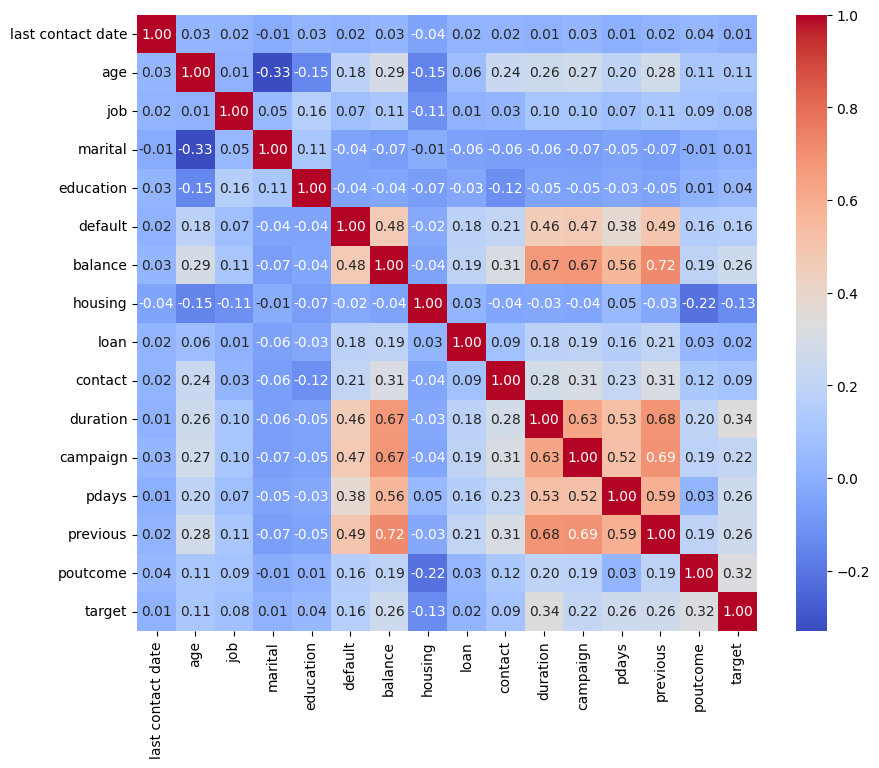

In [10]:
corr=train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

**filling the missing values wiht the mode of the categoracal variables**

In [11]:
columns_to_impute = ['poutcome', 'contact', 'education', 'job']

for column in columns_to_impute:
    mode_value = train[column].mode()[0]
    train[column].fillna(mode_value, inplace=True)
    print(f"Filled missing values in '{column}' with mode: {mode_value} (Count: {(train[column] == mode_value).sum()})")

Filled missing values in 'poutcome' with mode: 0.0 (Count: 34400)
Filled missing values in 'contact' with mode: 0.0 (Count: 35366)
Filled missing values in 'education' with mode: 1.0 (Count: 21051)
Filled missing values in 'job' with mode: 1.0 (Count: 8005)


/tmp/ipykernel_141/3106579641.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[column].fillna(mode_value, inplace=True)


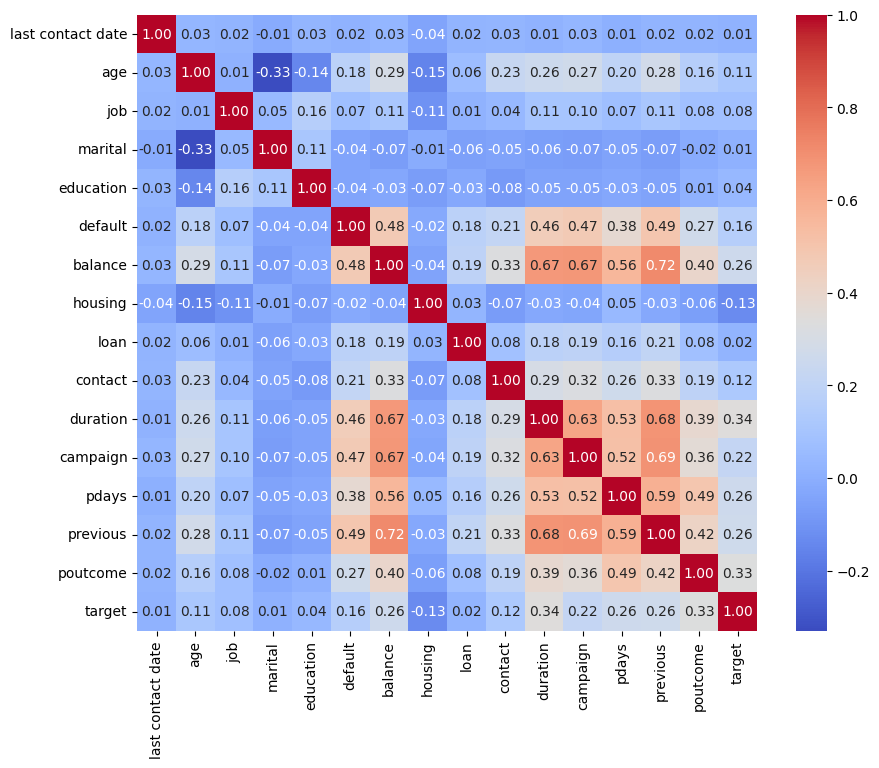

In [12]:
corr_corrected=train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_corrected, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

we can conder constructing a CI to determine which features to keep and which to discard 

In [13]:
# droping it so as to remove the negatively correlated column
train.drop('housing',inplace=True,axis=1)

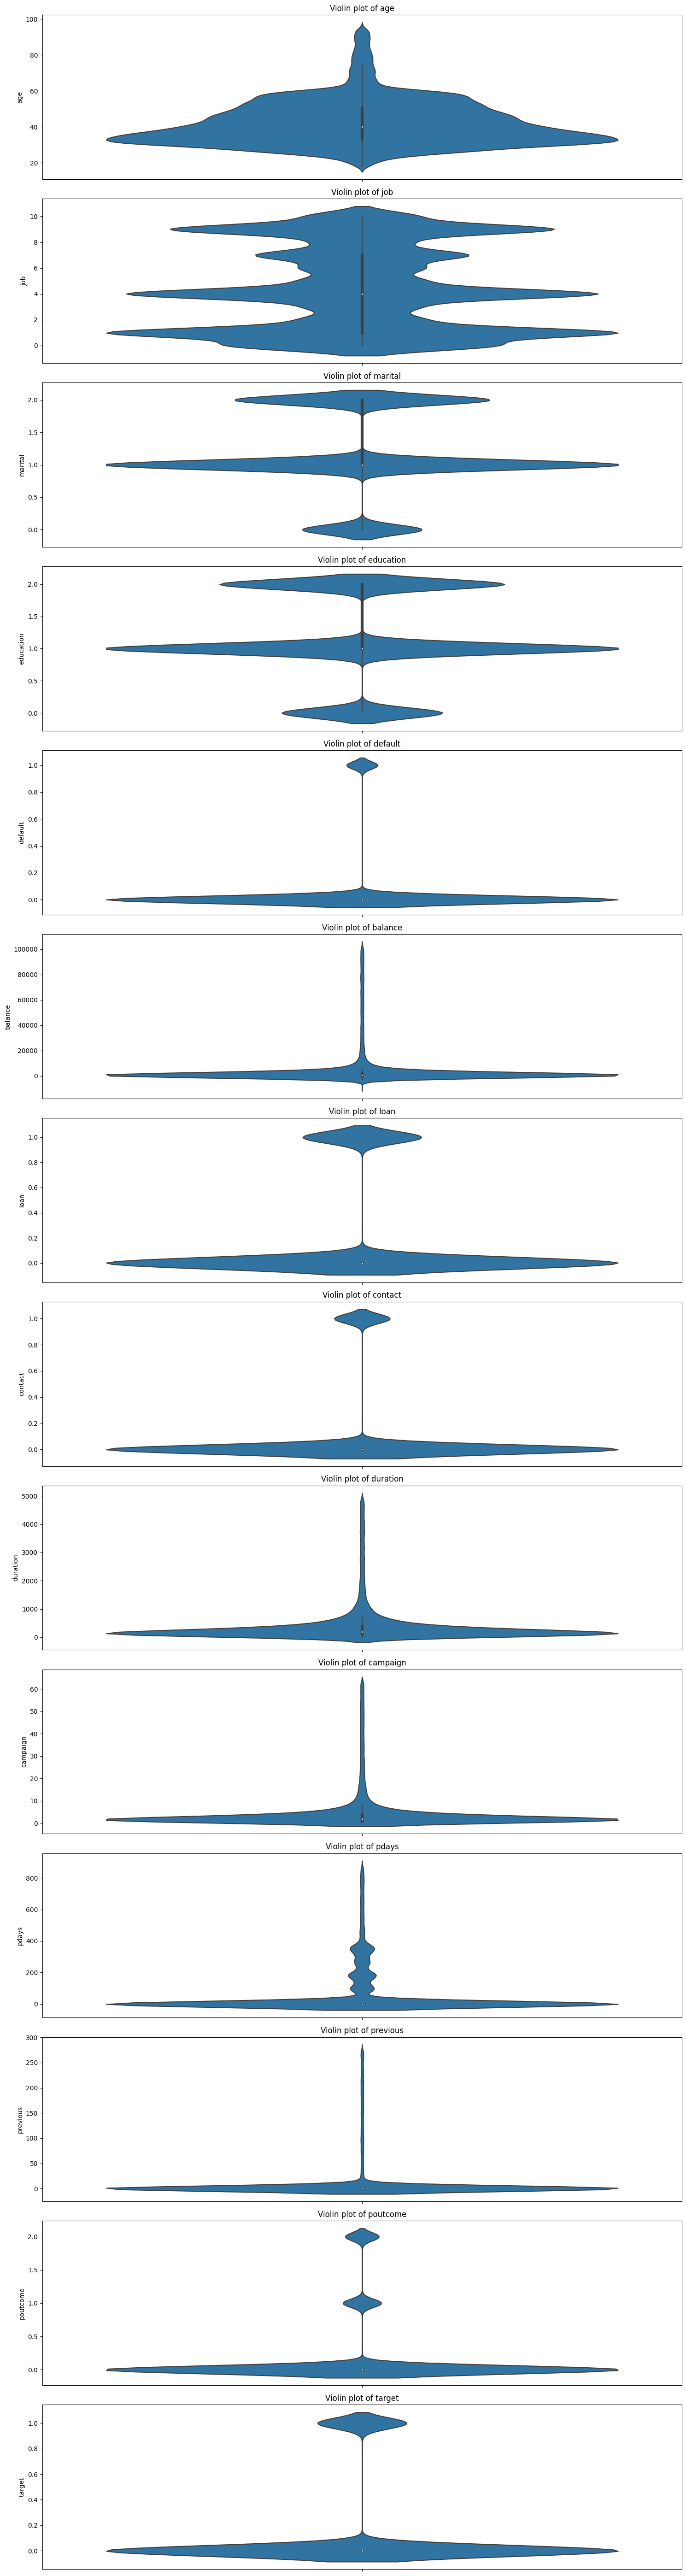

In [14]:
# violin plots
num_cols = train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, len(num_cols) * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.violinplot(data=train, y=col)
    plt.title(f'Violin plot of {col}')

plt.tight_layout()
plt.show()


- the majority of tragets are 0s, which would cause class imbalance
- we have to remove outliers from pdays, previous, campaign, duration, balance and age

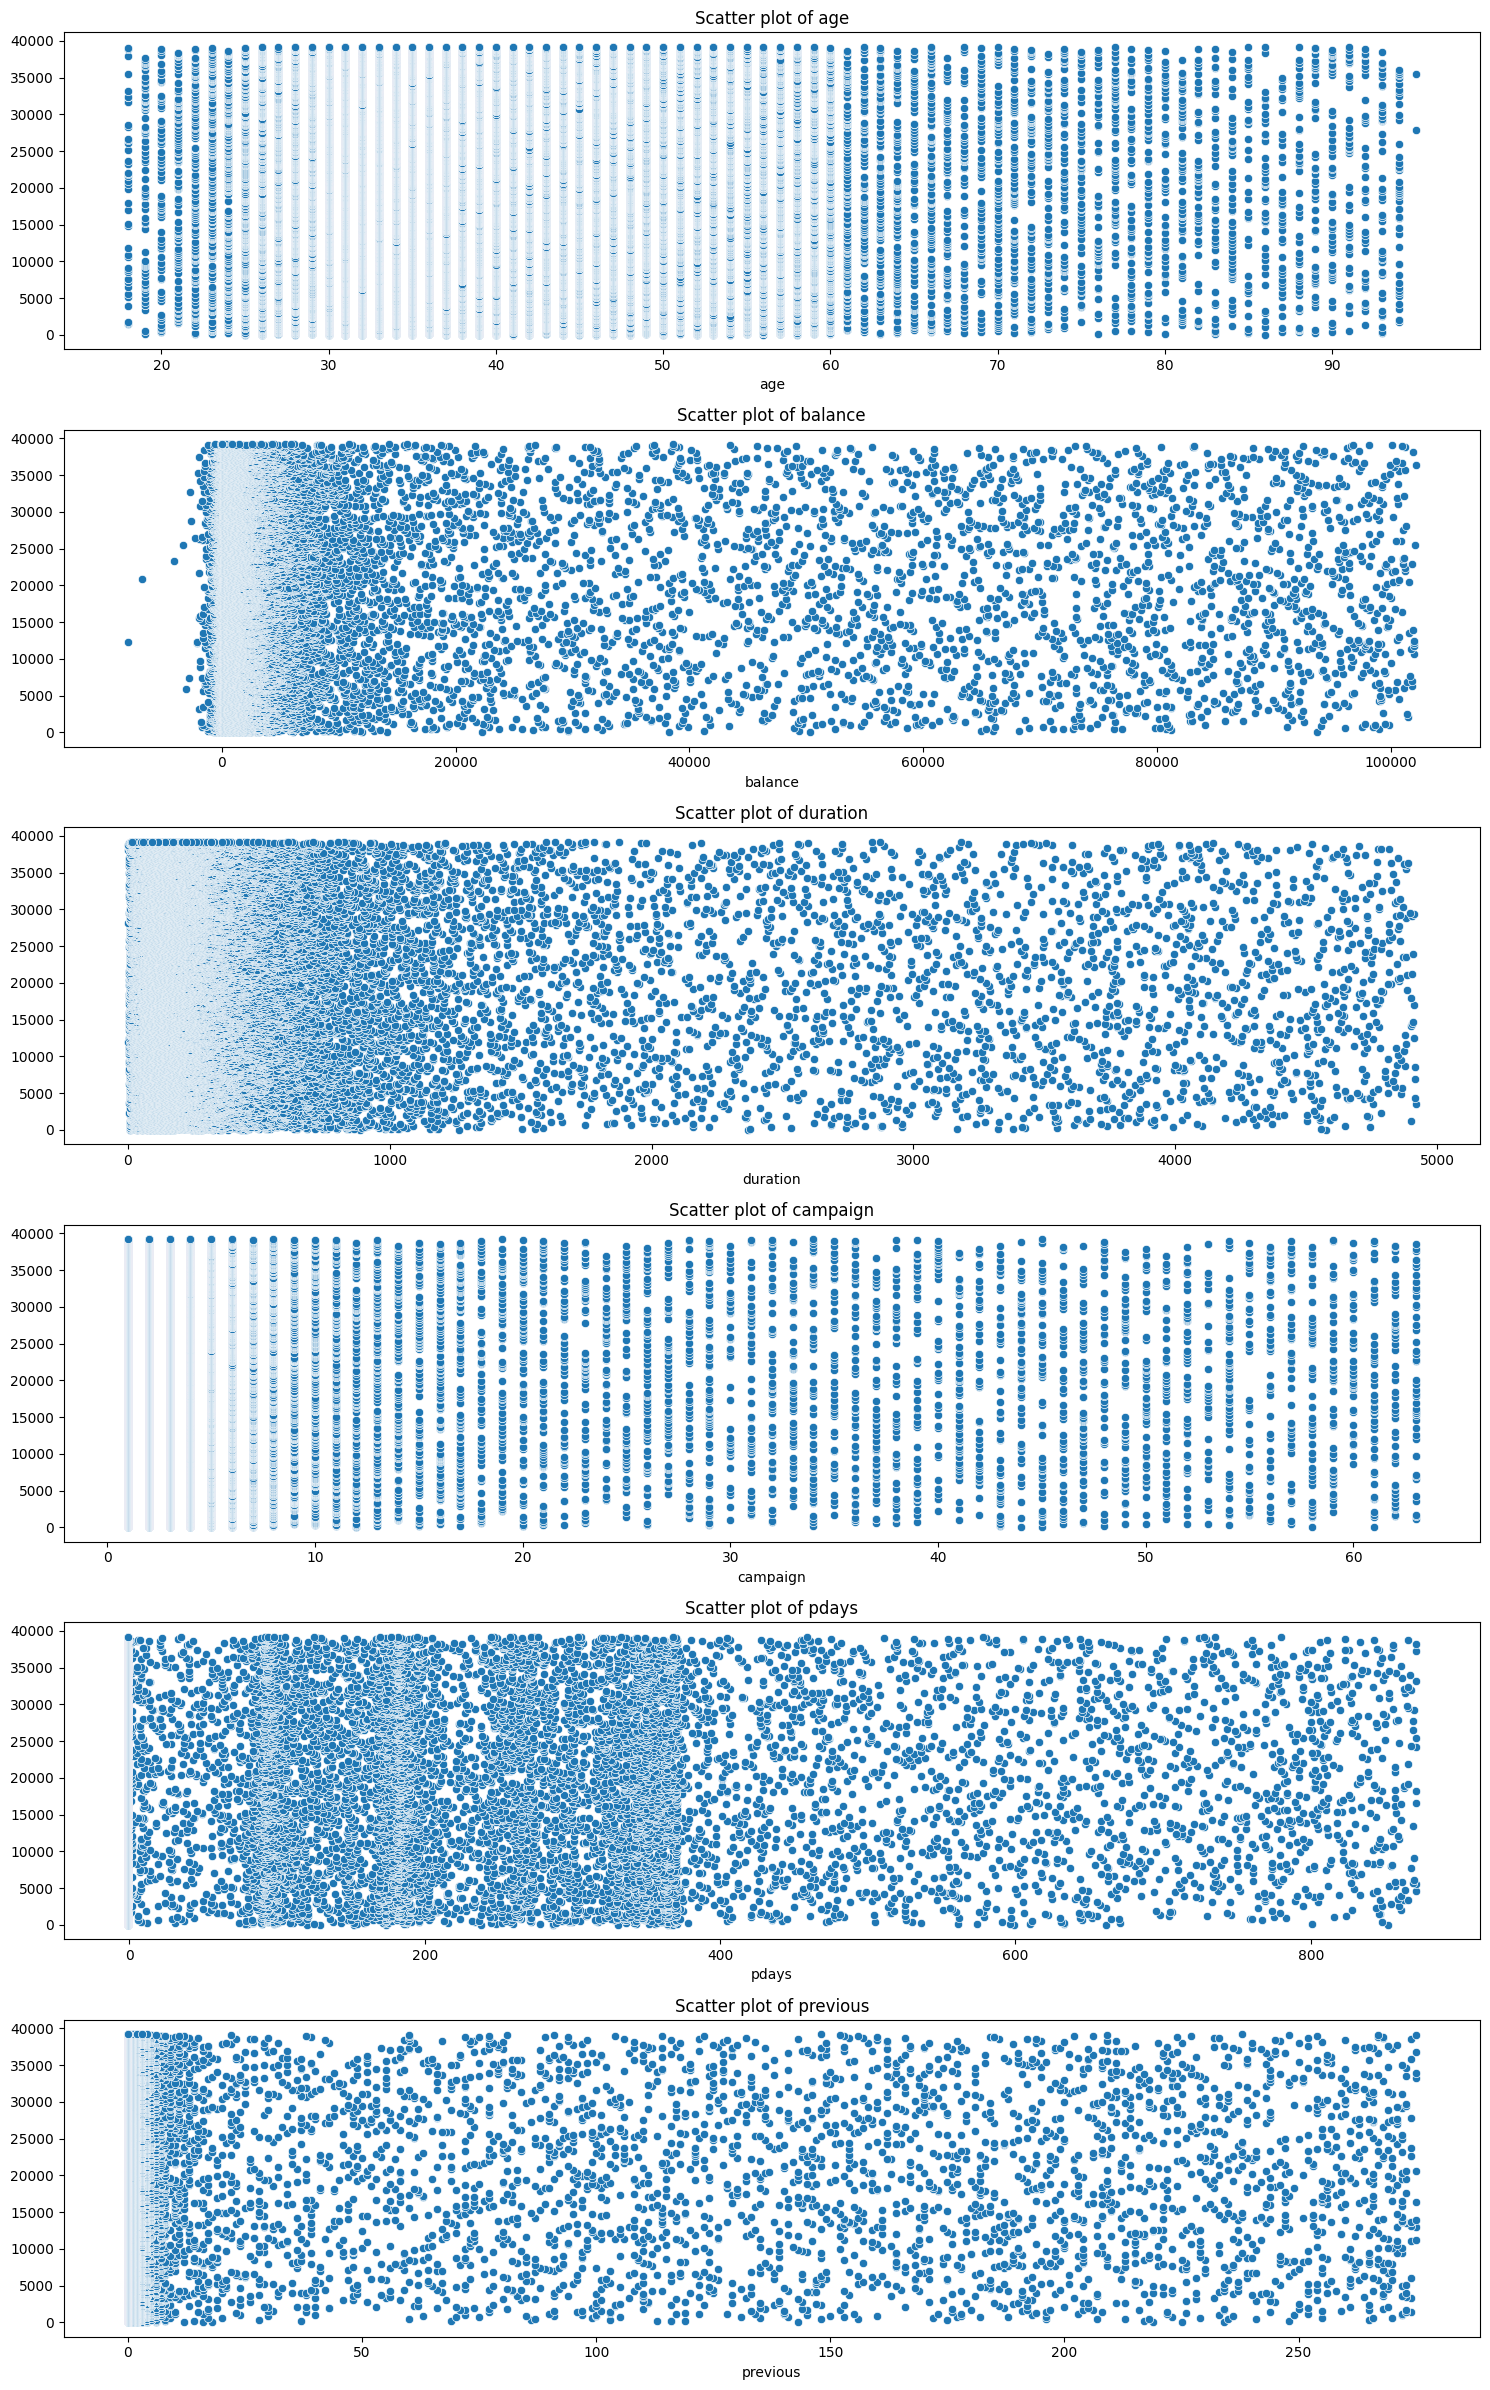

In [15]:
# scatter plots
num_cols = train.select_dtypes(include=['int64']).columns
plt.figure(figsize=(15, len(num_cols) * 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.scatterplot(data=train, x=col, y=train.index)  
    plt.title(f'Scatter plot of {col}')
plt.tight_layout()
plt.show()

In [16]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Cap any negative values at 0
        df[col] = df[col].apply(lambda x: max(x, 0))
    
    return df

num_cols = train.select_dtypes(include=['int64']).columns.tolist()
# num_cols.remove('previous')

train_cleaned = remove_outliers(train, num_cols)
train_cleaned.reset_index(drop=True, inplace=True)
train_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23209 entries, 0 to 23208
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   last contact date  23209 non-null  datetime64[ns]
 1   age                23209 non-null  int64         
 2   job                23209 non-null  float64       
 3   marital            23209 non-null  float64       
 4   education          23209 non-null  float64       
 5   default            23209 non-null  float64       
 6   balance            23209 non-null  int64         
 7   loan               23209 non-null  float64       
 8   contact            23209 non-null  float64       
 9   duration           23209 non-null  int64         
 10  campaign           23209 non-null  int64         
 11  pdays              23209 non-null  int64         
 12  previous           23209 non-null  int64         
 13  poutcome           23209 non-null  float64       
 14  target

/tmp/ipykernel_141/3211016141.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: max(x, 0))


In [17]:
train

last contact date  age  job  marital  education  default  balance  loan  \
0            2009-04-17   26  1.0      1.0        1.0      0.0      647   0.0   
1            2009-10-11   52  9.0      1.0        1.0      0.0      553   0.0   
2            2010-11-20   44  1.0      1.0        1.0      0.0     1397   0.0   
3            2009-09-01   33  0.0      1.0        1.0      0.0      394   0.0   
4            2008-01-29   31  2.0      2.0        2.0      0.0      137   0.0   
...                 ...  ...  ...      ...        ...      ...      ...   ...   
39206        2008-07-31   31  9.0      2.0        1.0      0.0        0   0.0   
39207        2009-07-31   59  0.0      1.0        0.0      0.0     6187   0.0   
39208        2008-06-02   36  1.0      1.0        1.0      0.0       63   0.0   
39209        2010-03-20   28  8.0      2.0        1.0      0.0     5916   0.0   
39210        2010-03-16   51  8.0      0.0        2.0      1.0    38594   0.0   

       contact  duration  campaign  pdays  previous  poutcome  target  
0          0.0       357         2    331         1       1.0     0.0  
1          1.0       160         1     -1         0       0.0     0.0  
2          0.0       326         1     -1         0       0.0     0.0  
3          1.0       104         3     -1         0       0.0     0.0  
4          0.0       445         2     -1         0       0.0     0.0  
...        ...       ...       ...    ...       ...       ...     ...  
39206      0.0        16        34     -1         0       0.0     0.0  
39207      0.0       114         4     -1         0       0.0     0.0  
39208      0.0        56         8     -1         0       0.0     0.0  
39209      0.0        93         5     -1         0       0.0     0.0  
39210      0.0      1877        19    780       148       2.0     1.0  

[39211 rows x 15 columns]

In [18]:
train_cleaned

last contact date  age   job  marital  education  default  balance  \
0            2009-10-11   52   9.0      1.0        1.0      0.0      553   
1            2010-11-20   44   1.0      1.0        1.0      0.0     1397   
2            2009-09-01   33   0.0      1.0        1.0      0.0      394   
3            2008-01-29   31   2.0      2.0        2.0      0.0      137   
4            2009-05-07   25   2.0      2.0        2.0      0.0      140   
...                 ...  ...   ...      ...        ...      ...      ...   
23204        2010-05-08   44   1.0      1.0        1.0      1.0        0   
23205        2010-05-23   32   0.0      1.0        1.0      0.0        0   
23206        2010-06-04   50  10.0      1.0        1.0      0.0      306   
23207        2010-05-27   40   1.0      1.0        0.0      1.0        0   
23208        2008-05-28   32   4.0      1.0        2.0      0.0     4307   

       loan  contact  duration  campaign  pdays  previous  poutcome  target  
0       0.0      1.0       160         1      0         0       0.0     0.0  
1       0.0      0.0       326         1      0         0       0.0     0.0  
2       0.0      1.0       104         3      0         0       0.0     0.0  
3       0.0      0.0       445         2      0         0       0.0     0.0  
4       0.0      0.0       348         1      0         0       0.0     0.0  
...     ...      ...       ...       ...    ...       ...       ...     ...  
23204   0.0      0.0       172         1      0         0       0.0     0.0  
23205   0.0      0.0       206         3      0         0       0.0     0.0  
23206   0.0      0.0       117         1      0         0       0.0     0.0  
23207   0.0      0.0       316         1      0         0       0.0     0.0  
23208   0.0      0.0        91         3      0         0       0.0     0.0  

[23209 rows x 15 columns]

**checking the plots again**

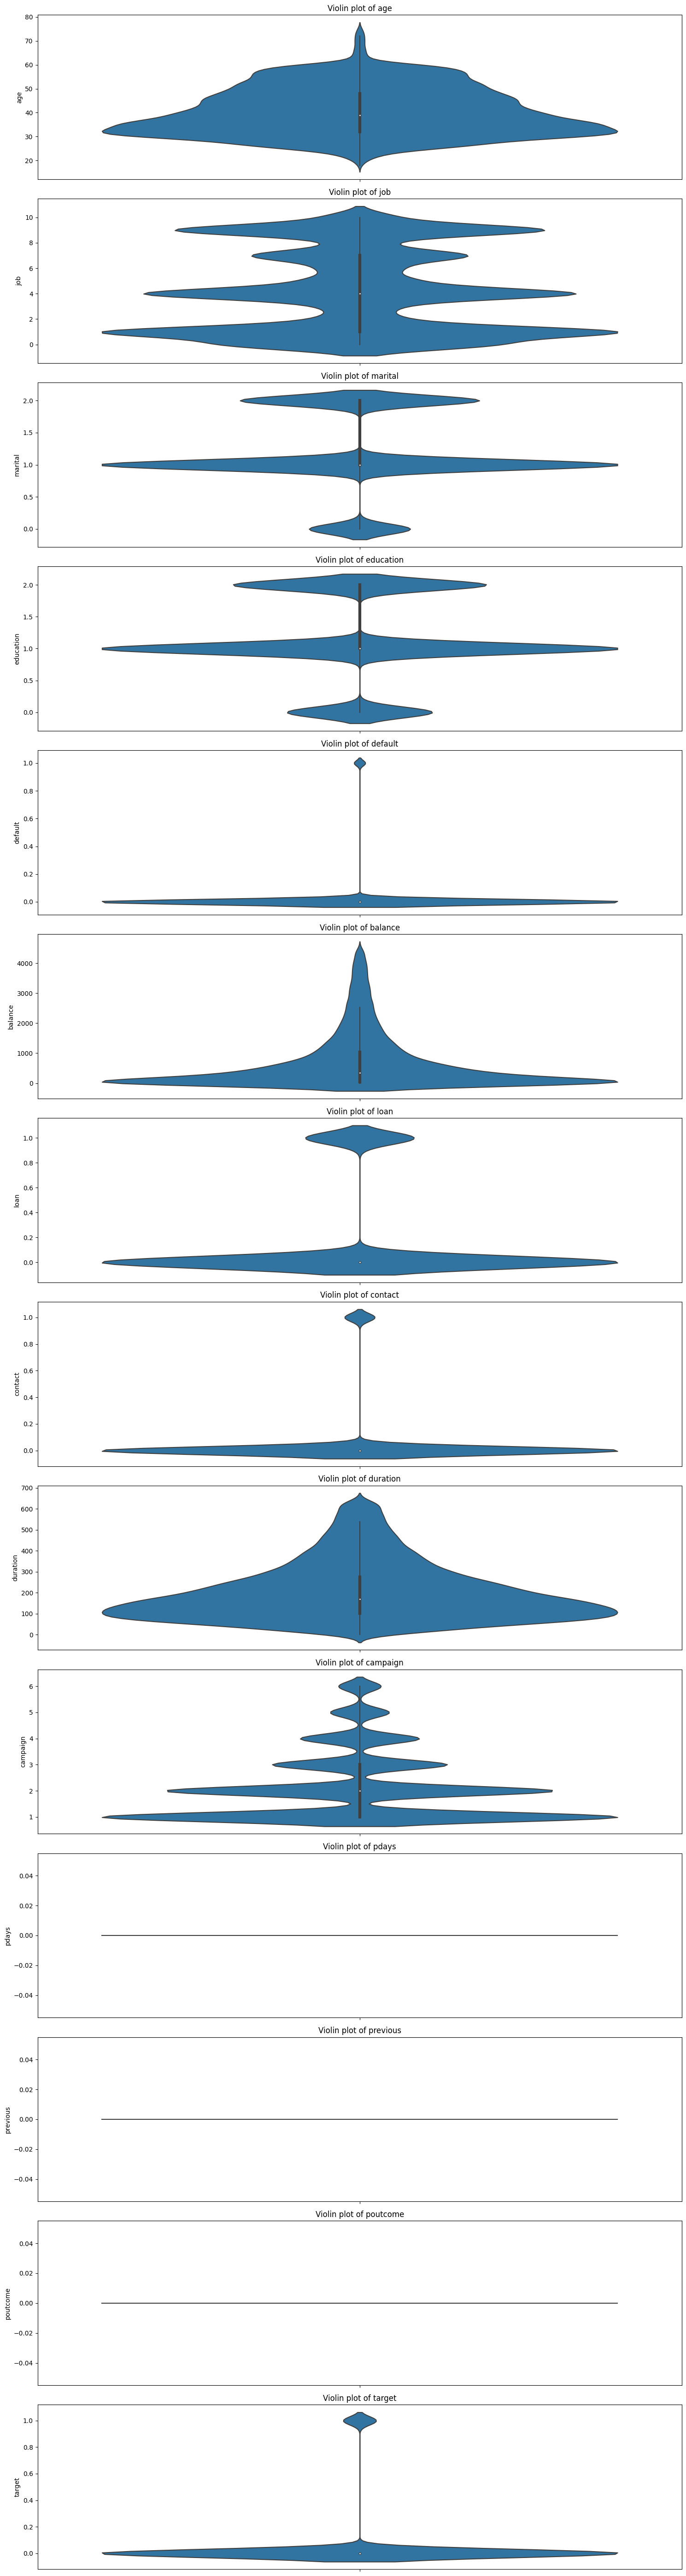

In [19]:
num_cols = train_cleaned.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, len(num_cols) * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.violinplot(data=train_cleaned, y=col)
    plt.title(f'Violin plot of {col}')

plt.tight_layout()
plt.show()


- pdays: Number of days since the customer was last contacted.
- previous: The number of contacts performed before this campaign.
- poutcome: The outcome of the previous campaign (e.g., 'success', 'failure').
- campaign: The number of contacts performed during this campaign.

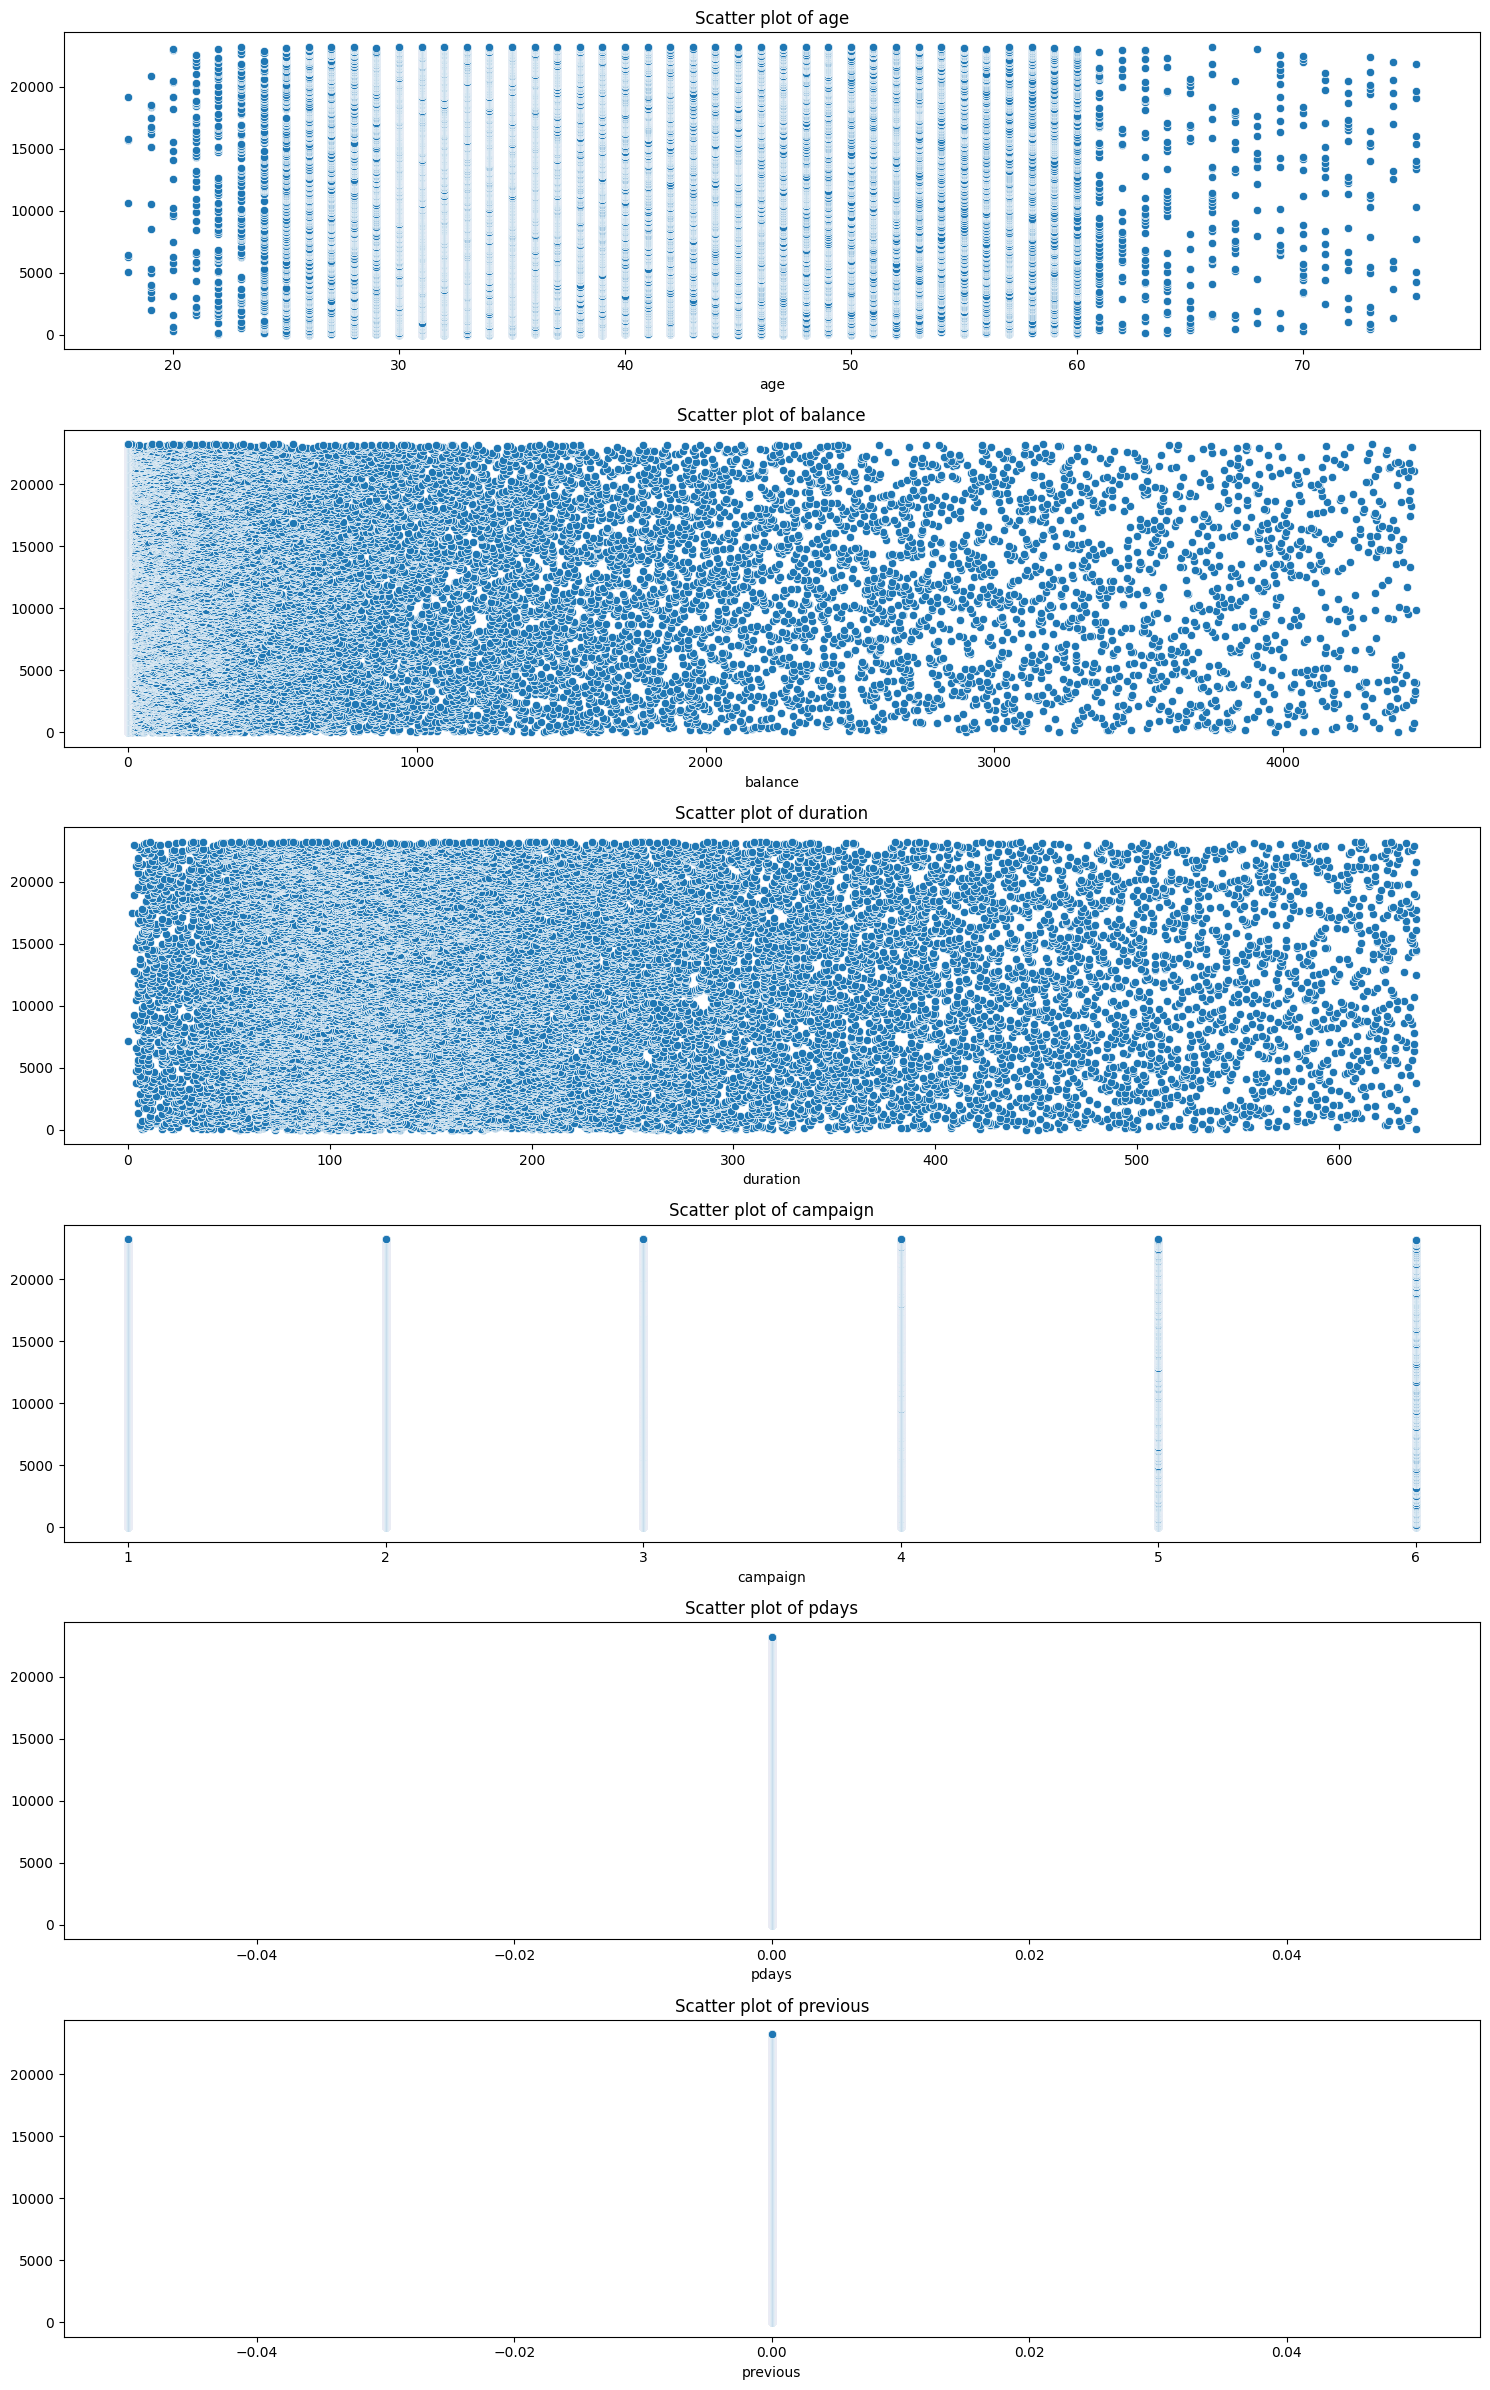

In [20]:
# scatter plots
num_cols = train_cleaned.select_dtypes(include=['int64']).columns
plt.figure(figsize=(15, len(num_cols) * 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.scatterplot(data=train_cleaned, x=col, y=train_cleaned.index)  
    plt.title(f'Scatter plot of {col}')
plt.tight_layout()
plt.show()

In [28]:
train_cleaned.drop(['last contact date','marital','loan'],inplace=True,axis=1)

the dataset now only contains clean and complete and only contains the columns that are positively correlated to the target. 

- the dataset still looks very random, so a decision tree or random forst regressor might work best for capturing the parameteres

## TTS

In [29]:
X = train_cleaned.drop('target', axis=1)
y = train_cleaned['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Baseline model

In [30]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## predictions and testing

In [31]:
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Cross-validation to get an average performance score
cross_val = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Output the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Cross-Validation Accuracy: {cross_val.mean():.4f}")

Accuracy: 0.9393
Precision: 0.6667
Recall: 0.0141
F1 Score: 0.0276
Confusion Matrix:
[[4356    2]
 [ 280    4]]
Cross-Validation Accuracy: 0.9410
